# Explosive Nucleosynthesis

Here we'll explore burning up to iron group.
To do this, we'll create a moderately-sized network that includes links from He up to iron-group.  And to make the integration easier, we'll do a few approximations along the way.

In [1]:
import pynucastro as pyna

## Assembling our library

We start with a list of nuclei, including all $\alpha$-nuclei up to ${}^{56}\mathrm{Ni}$.
We also add the intermediate nuclei that would participate in $(\alpha,p)(p,\gamma)$ reactions,
as well as a few more nuclei, including those identified by [Shen & Bildsten 2009](https://ui.adsabs.harvard.edu/abs/2009ApJ...699.1365S/abstract) for bypassing the ${}^{12}\mathrm{C}(\alpha,\gamma){}^{16}\mathrm{O}$ rate.

In [2]:
nuclei = ["p",
          "he4", "c12", "o16", "ne20", "mg24", "si28", "s32",
          "ar36", "ca40", "ti44", "cr48", "fe52", "ni56", "zn60",
          "al27", "p31", "cl35", "k39", "sc43", "v47",
          "mn51", "co55", "cu59",
          "n13", "n14", "f18", "ne21", "na22", "na23"]

For our initial library, we take all of the ReacLib rates that link these.

In [3]:
reaclib_lib = pyna.ReacLibLibrary()
core_lib = reaclib_lib.linking_nuclei(nuclei)

Now we'll add some more nuclei in the iron group.

In [4]:
iron_peak = ["n", "p", "he4",
             "mn51",
             "fe52", "fe53", "fe54", "fe55", "fe56",
             "co55", "co56", "co57",
             "ni56", "ni57", "ni58",
             "cu59", "zn60"]

We want the rates that connect these from ReacLib as well as tabulated weak rate compilations.

In [5]:
iron_reaclib = reaclib_lib.linking_nuclei(iron_peak)

weak_lib = pyna.TabularLibrary()
iron_weak_lib = weak_lib.linking_nuclei(iron_peak)

In [6]:
all_lib = core_lib + iron_reaclib + iron_weak_lib

### Detailed balance

Finally, we replace the reverse rates from ReacLib by rederiving them via detailed balance, and including the partition functions.

In [7]:
rates_to_derive = all_lib.backward().get_rates()

# now for each of those derived rates, look to see if the pair exists

for r in rates_to_derive:
    fr = all_lib.get_rate_by_nuclei(r.products, r.reactants)
    if fr:
        all_lib.remove_rate(r)
        d = pyna.DerivedRate(rate=fr, compute_Q=True, use_pf=True)
        all_lib.add_rate(d)

### Removing duplicates

There will be some duplicate rates now because we pulled rates both from ReacLib and from tabulated sources.  Here we keep the tabulated version of any duplicate rates.

In [8]:
all_lib.eliminate_duplicates()

## Creating the network and rate approximations

Now that we have our library, we can make a network.

In [9]:
net = pyna.PythonNetwork(libraries=[all_lib])

Next, we will do the $(\alpha,p)(p,\gamma)$ approximation and eliminate the intermediate nuclei

In [10]:
net.make_ap_pg_approx(intermediate_nuclei=["cl35", "k39", "sc43", "v47"])
net.remove_nuclei(["cl35", "k39", "sc43", "v47"])

using approximate rate S32 + He4 ⟶ Ar36 + 𝛾
using approximate rate Ar36 ⟶ S32 + He4
using approximate rate Ar36 + He4 ⟶ Ca40 + 𝛾
using approximate rate Ca40 ⟶ Ar36 + He4
using approximate rate Ca40 + He4 ⟶ Ti44 + 𝛾
using approximate rate Ti44 ⟶ Ca40 + He4
using approximate rate Ti44 + He4 ⟶ Cr48 + 𝛾
using approximate rate Cr48 ⟶ Ti44 + He4
removing rate S32 + He4 ⟶ Ar36 + 𝛾
removing rate S32 + He4 ⟶ p + Cl35
removing rate Cl35 + p ⟶ Ar36 + 𝛾
removing rate Ar36 ⟶ He4 + S32
removing rate Ar36 ⟶ p + Cl35
removing rate Cl35 + p ⟶ He4 + S32
removing rate Ar36 + He4 ⟶ Ca40 + 𝛾
removing rate Ar36 + He4 ⟶ p + K39
removing rate K39 + p ⟶ Ca40 + 𝛾
removing rate Ca40 ⟶ He4 + Ar36
removing rate Ca40 ⟶ p + K39
removing rate K39 + p ⟶ He4 + Ar36
removing rate Ca40 + He4 ⟶ Ti44 + 𝛾
removing rate Ca40 + He4 ⟶ p + Sc43
removing rate Sc43 + p ⟶ Ti44 + 𝛾
removing rate Ti44 ⟶ He4 + Ca40
removing rate Ti44 ⟶ p + Sc43
removing rate Sc43 + p ⟶ He4 + Ca40
removing rate Ti44 + He4 ⟶ Cr48 + 𝛾
removing rate Ti44

We will also approximate some of the neutron captures:

In [11]:
net.make_nn_g_approx(intermediate_nuclei=["fe53", "fe55", "ni57"])
net.remove_nuclei(["fe53", "fe55", "ni57"])

approximating out Fe53
using approximate rate Fe52 + n + n ⟶ Fe54 + 𝛾
using approximate rate Fe54 ⟶ Fe52 + n + n
approximating out Fe55
using approximate rate Fe54 + n + n ⟶ Fe56 + 𝛾
using approximate rate Fe56 ⟶ Fe54 + n + n
approximating out Ni57
using approximate rate Ni56 + n + n ⟶ Ni58 + 𝛾
using approximate rate Ni58 ⟶ Ni56 + n + n
removing rate Fe52 + n ⟶ Fe53 + 𝛾
removing rate Fe53 + n ⟶ Fe54 + 𝛾
removing rate Fe54 ⟶ n + Fe53
removing rate Fe53 ⟶ n + Fe52
removing rate Fe54 + n ⟶ Fe55 + 𝛾
removing rate Fe55 + n ⟶ Fe56 + 𝛾
removing rate Fe56 ⟶ n + Fe55
removing rate Fe55 ⟶ n + Fe54
removing rate Ni56 + n ⟶ Ni57 + 𝛾
removing rate Ni57 + n ⟶ Ni58 + 𝛾
removing rate Ni58 ⟶ n + Ni57
removing rate Ni57 ⟶ n + Ni56
looking to remove Fe53 + He4 ⟶ Ni57 + 𝛾
looking to remove Fe53 + He4 ⟶ p + Co56
looking to remove Ni56 + n ⟶ He4 + Fe53
looking to remove Ni57 ⟶ He4 + Fe53
looking to remove Fe53 + He4 ⟶ n + Ni56
looking to remove Co56 + p ⟶ He4 + Fe53
looking to remove Fe55 + p ⟶ Co56 + 𝛾
loo

and finally, make some of the protons into NSE protons

In [12]:
# make all rates with A >= 48 use NSE protons
net.make_nse_protons(48)

modifying p_Mn51__Fe52 to use NSE protons
modifying Fe52__p_Mn51__derived to use NSE protons
modifying p_Co55__Ni56 to use NSE protons
modifying Ni56__p_Co55__derived to use NSE protons
modifying p_Cu59__Zn60 to use NSE protons
modifying Zn60__p_Cu59__derived to use NSE protons
modifying He4_Cr48__p_Mn51 to use NSE protons
modifying p_Mn51__He4_Cr48__derived to use NSE protons
modifying He4_Fe52__p_Co55 to use NSE protons
modifying p_Co55__He4_Fe52__derived to use NSE protons
modifying p_Cu59__He4_Ni56 to use NSE protons
modifying He4_Ni56__p_Cu59__derived to use NSE protons
modifying p_Fe54__Co55 to use NSE protons
modifying Co55__p_Fe54__derived to use NSE protons
modifying p_Fe56__Co57 to use NSE protons
modifying Co57__p_Fe56__derived to use NSE protons
modifying p_Co57__Ni58 to use NSE protons
modifying Ni58__p_Co57__derived to use NSE protons
modifying p_Ni58__Cu59 to use NSE protons
modifying Cu59__p_Ni58__derived to use NSE protons
modifying He4_Mn51__p_Fe54 to use NSE protons


### Visualizing the network

Let's visualize the network

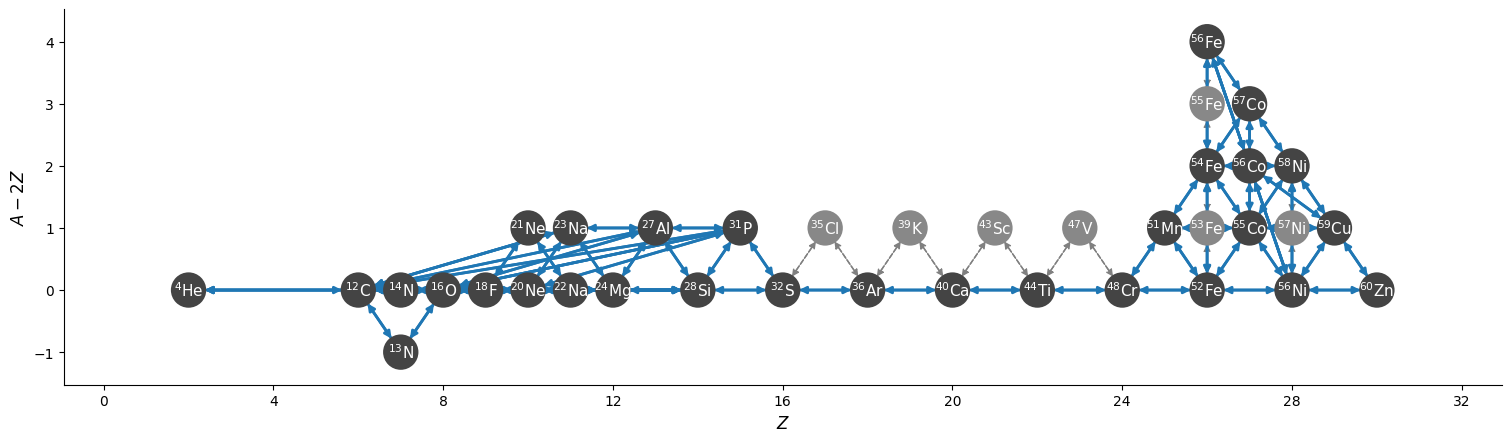

In [13]:
fig = net.plot(rotated=True, hide_xalpha=True,
               size=(1500, 450),
               node_size=550, node_font_size=11)

## Burning to iron-group

We'll write out the network to a python module and do a test integration with it.

In [14]:
net.write_network("he_burn.py")

/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:126: UserWarning: C12 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:126: UserWarning: N13 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:126: UserWarning: N14 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:126: UserWarning: p_nse partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(

In [15]:
import he_burn

In [16]:
from scipy.integrate import solve_ivp
import numpy as np

We'll pick thermodynamic conditions that are very dense and hot--we should enter NSE here.  And weak rates will also have a big effect, meaning that $Y_e$ should evolve.

Initially, we have $Y_e = 1/2$.

In [17]:
rho = 1.e9
T = 5.e9

X0 = np.zeros(he_burn.nnuc)
X0[he_burn.jhe4] = 0.95
X0[he_burn.jc12] = 0.02

Y0 = X0/he_burn.A

In [18]:
from pynucastro.screening import chugunov_2007

We'll specific the time-points where we want to store the solution.

In [28]:
tmax = 1.0
tmin = 1.e-12
factor = 6
n = factor * int(np.log10(tmax) - np.log10(tmin)) + 1
t_eval = np.logspace(np.log10(tmin), np.log10(tmax), n, endpoint=True)

In [29]:
sol = solve_ivp(he_burn.rhs, [0, tmax], Y0,
                method="BDF", jac=he_burn.jacobian,
                t_eval=t_eval, args=(rho, T, chugunov_2007),
                rtol=1.e-5, atol=1.e-8)

Was the integration successful?

In [30]:
sol.success

True

### Plotting the evolution

In [31]:
import matplotlib.pyplot as plt

Here we only plot the most abundant species

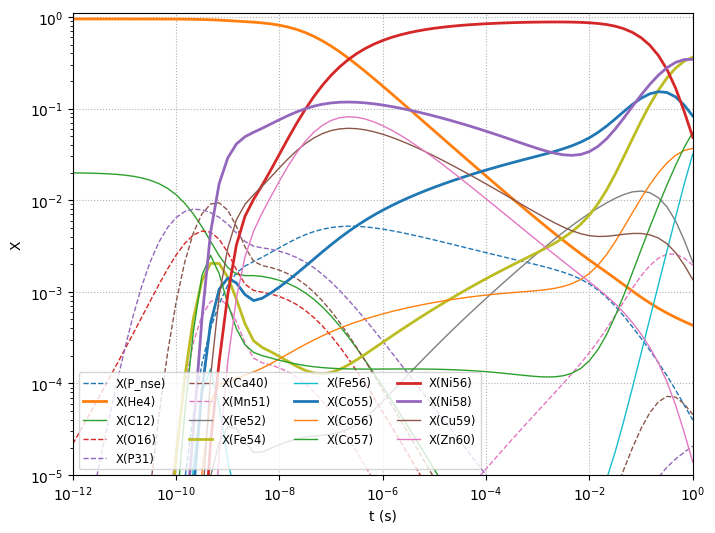

In [34]:
fig, ax = plt.subplots()

for i in range(he_burn.nnuc):
    Xmax = sol.y[i, :].max() * he_burn.A[i]
    if Xmax > 1.e-1:
        ax.loglog(sol.t, sol.y[i,:] * he_burn.A[i], linewidth=2,
                  label=f"X({he_burn.names[i].capitalize()})")
    elif Xmax > 1.e-2:
        ax.loglog(sol.t, sol.y[i,:] * he_burn.A[i], linewidth=1,
                  label=f"X({he_burn.names[i].capitalize()})")
    elif Xmax > 1.e-3:
        ax.loglog(sol.t, sol.y[i,:] * he_burn.A[i], linewidth=1, ls="--",
                  label=f"X({he_burn.names[i].capitalize()})")
        
ax.set_ylim(1.e-5, 1.1)
ax.legend(fontsize="small", ncol=4, loc=3)
ax.set_xlabel("t (s)")
ax.set_ylabel("X")
ax.margins(0)
ax.grid(ls=":")
fig.set_size_inches(8, 6)

### $Y_e$ evolution

In [24]:
X_final = sol.y[:, -1] * he_burn.A
comp = pyna.Composition(net.unique_nuclei)
comp.set_array(X_final)

Notice that $Ye$ has changed a bit due to electron captures.

In [25]:
comp.ye

0.48278945565002296

### Visualizing network flow

Finally, we can visualize the evolution of the flow through the network.  We'll just work with a few of the times that were saved.

/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:126: UserWarning: C12 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:126: UserWarning: N13 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:126: UserWarning: N14 partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(UserWarning(f'{nuc} partition function is not supported by tables: set pf = 1.0 by default'))
/home/zingale/development/pynucastro/pynucastro/rates/derived_rate.py:126: UserWarning: p_nse partition function is not supported by tables: set pf = 1.0 by default
  warnings.warn(

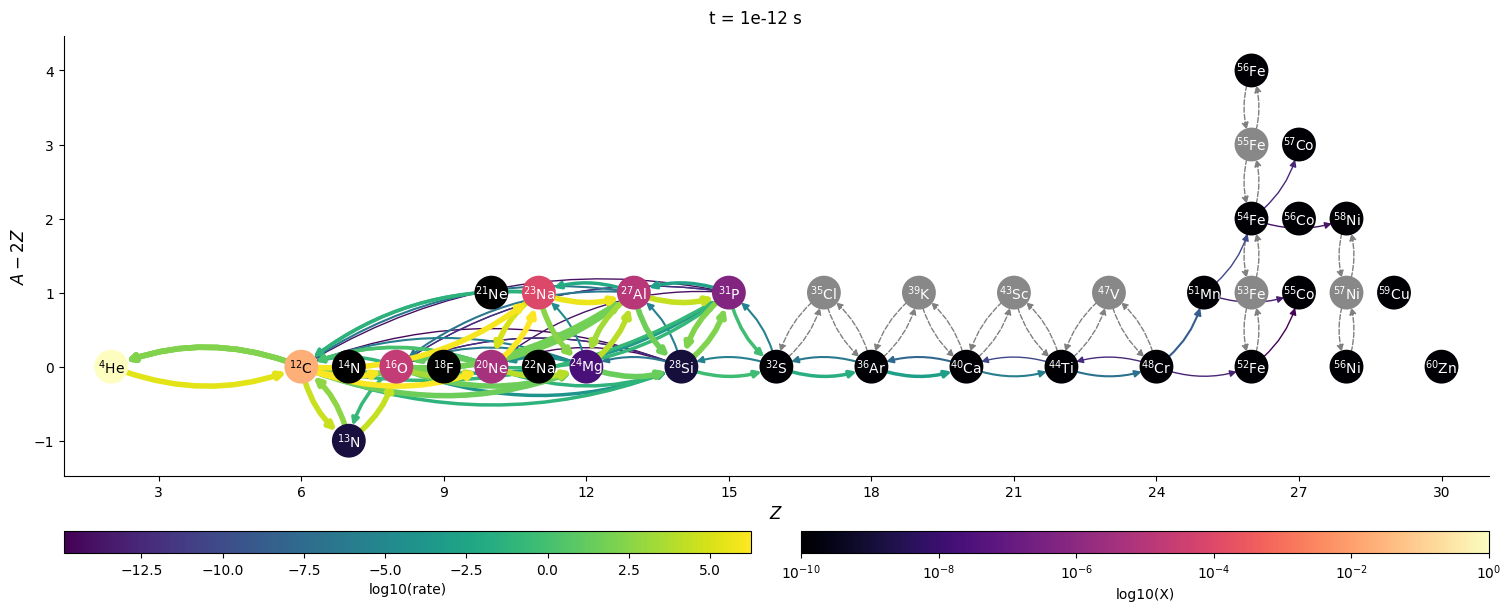

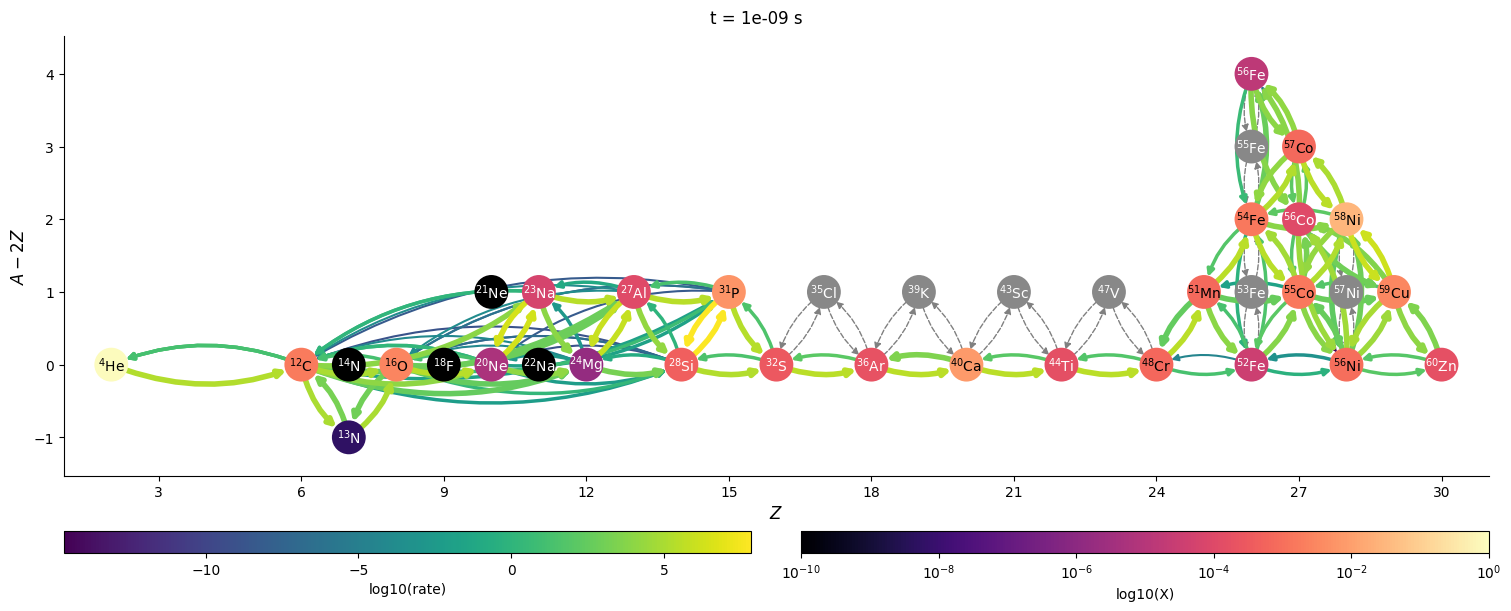

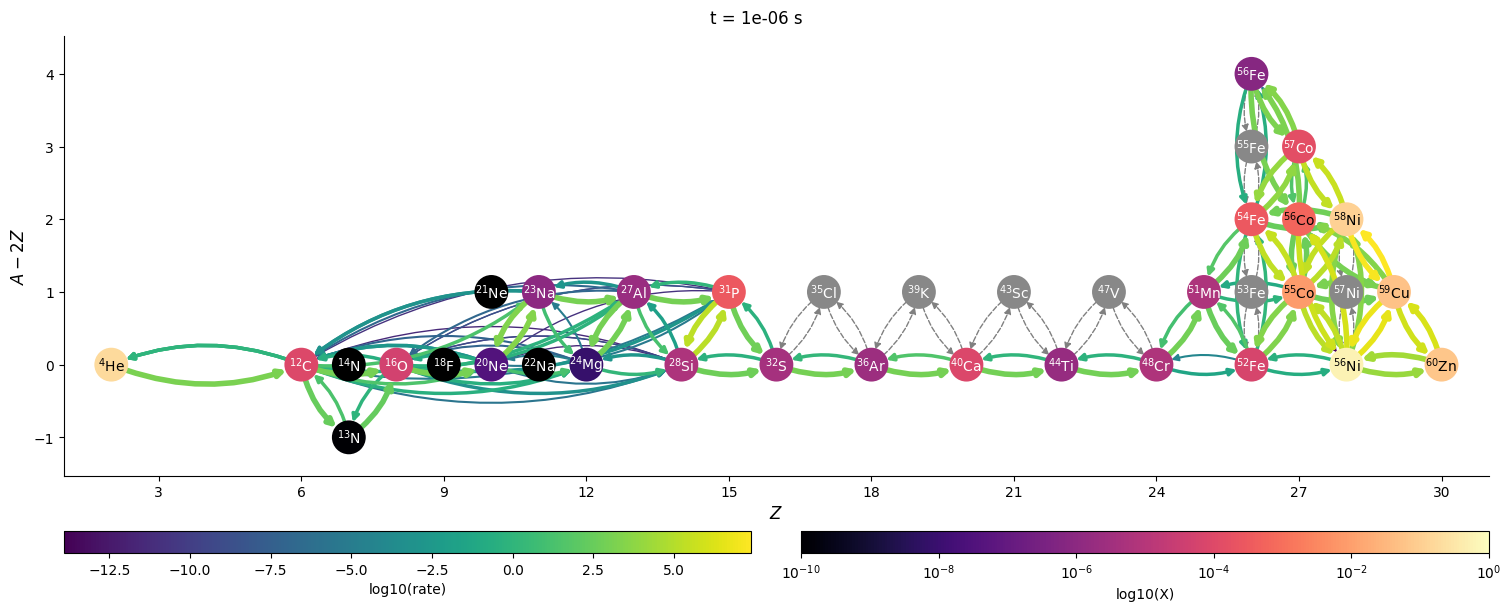

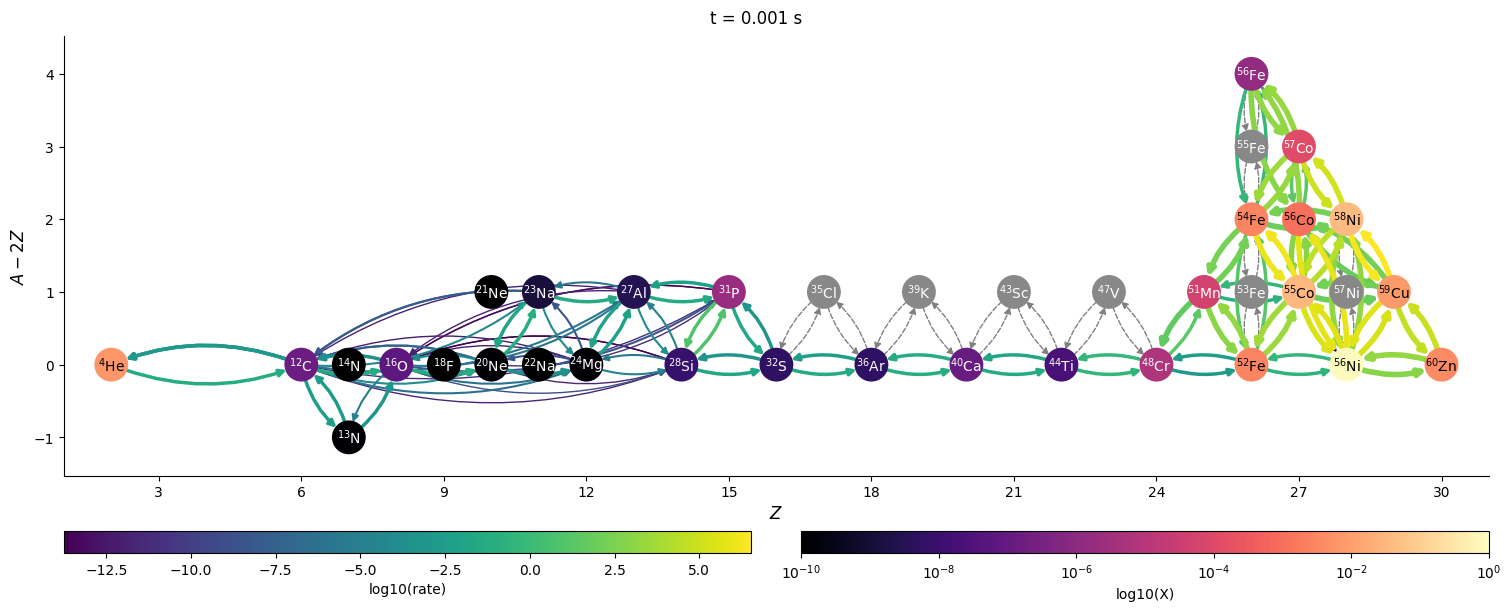

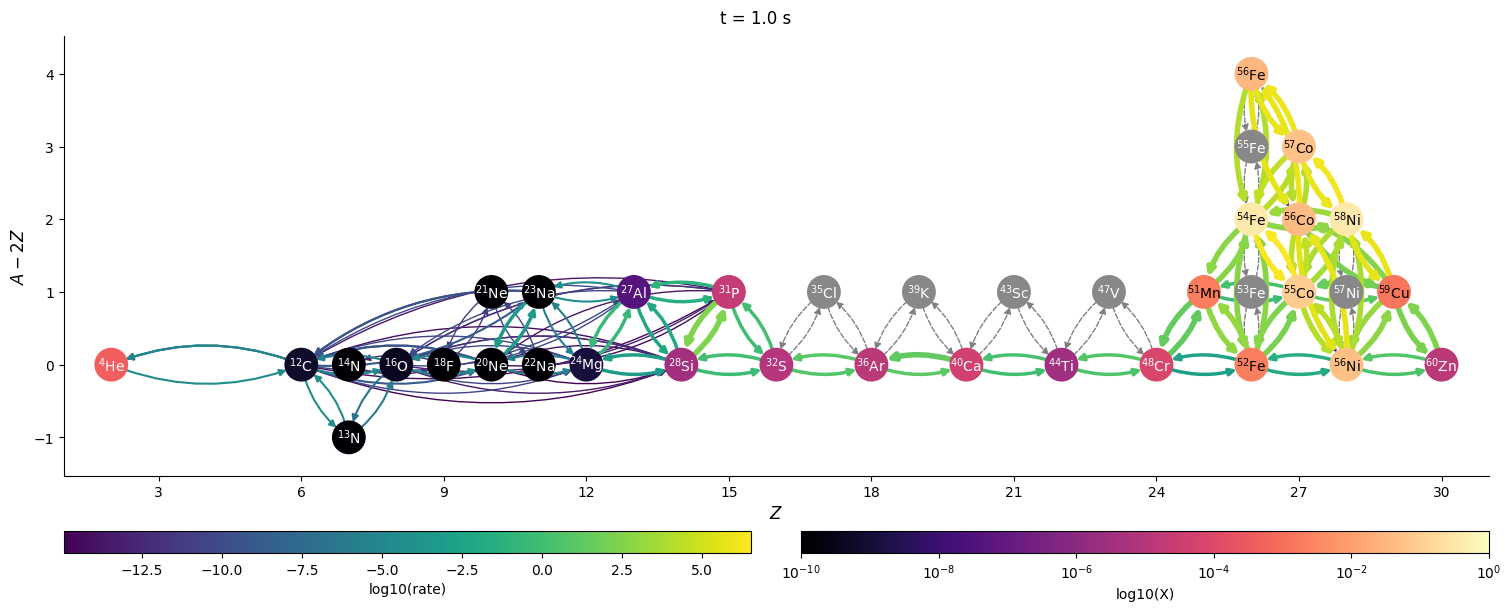

In [37]:
for idx in range(0, n, 3*factor):
    t = sol.t[idx]
    Y = sol.y[:, idx]
    comp.set_array(Y * he_burn.A)
    fig = net.plot(rho, T, comp,
                   rotated=True, hide_xalpha=True, curved_edges=True,
                   size=(1500, 600),                
                   ydot_cutoff_value=1.e-15,
                   color_nodes_by_abundance=True,
                   Z_range=(1, 31),
                   node_size=500, node_font_size=10)
    fig.suptitle(f"t = {t} s")